In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
yield_data = pd.read_excel("2021 Yield.xlsx")

In [50]:
yield_data.head()

,Plot Number,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
0,1,2S,2.0,75.328418,"Corn/Soy, Spring Manure","CS, SM"
1,2,6S,6.0,77.482016,"Corn/Soy, Fall Manure","CS, FM"
2,3,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,3.1,3.1,231.645855,Continuous Corn,CC
4,5,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC


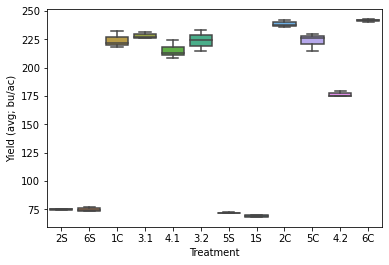

In [51]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = yield_data)
plt.savefig('all_yield_box.png')

Including all of the yield data on the same plot doesn't make sense because some treatments are soybeans and some are corn

In [52]:
yield_data.dtypes

Plot Number                int64
Treatment                 object
Simp. Treatment          float64
Yield (avg; bu/ac)       float64
Treatment Description     object
Short Trt Description     object
dtype: object

In [53]:
yield_data['Treatment'] = yield_data['Treatment'].astype('string')
yield_data.dtypes

Plot Number                int64
Treatment                 string
Simp. Treatment          float64
Yield (avg; bu/ac)       float64
Treatment Description     object
Short Trt Description     object
dtype: object

Filtering out the soybean treatment data

In [54]:
corn_only = yield_data[yield_data['Treatment'].str.contains('1C|2C|3.1|3.2|4.1|4.2|5C|6C')]
corn_only.head()

,Plot Number,Treatment,Simp. Treatment,Yield (avg; bu/ac),Treatment Description,Short Trt Description
2,3,1C,1.0,232.173281,"Corn/Soy, Spring UAN","CS, SUAN"
3,4,3.1,3.1,231.645855,Continuous Corn,CC
4,5,4.1,4.1,208.940519,Continuous Corn + PGC,CC + PGC
5,6,3.2,3.2,223.988531,Continuous Corn + 30 in ISC,CC + 30ISC
10,11,2C,2.0,237.683989,"Corn/Soy, Spring Manure","CS, SM"


In [55]:
len(corn_only)

24

Making sure all of the treatments were included. There are 8 treatments with corn growing and each treatment has three reps, so 24 is correct. 

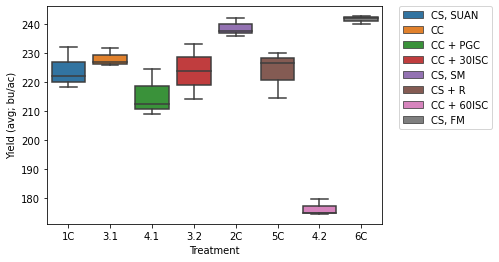

In [57]:
ax = sns.boxplot(x = "Treatment", y = "Yield (avg; bu/ac)", data = corn_only, hue = 'Short Trt Description', dodge = False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('corn_yield_box.png')